<a href="https://colab.research.google.com/github/champsleague/Deep-Learning/blob/main/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.2 MB/s eta 0:00:00


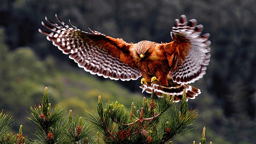

In [ ]:
from fastbook import *

urls = search_images_ddg('bird photos',max_images=1)
len(urls),urls[0]

dest = Path('bird.jpg')
if not dest.exists():download_url(urls[0],dest,show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)



In [ ]:
from fastcore.all import *
import time

def search_images(term, max_images=200):
    url = "https://duckduckgo.com/"
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&',res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en',o='json',q=term, vqd=searchObj.group(1),f='...',p='1',v7exp='a')
    urls.data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
      data = urljson(requestUrl, data=params)
      urls.update(L(data['results']).itemgot('image'))
      requestUrl = url + data['next']
      time.sleep(0.2)
    return L(urls)[:max_images]



In [ ]:
urls = search_images_ddg('bird photos',max_images=1)
len(urls),urls[0]

(1,
 'https://wallup.net/wp-content/uploads/2018/10/07/536806-bird-animal-beautiful-wild-wings-exotic-birds.jpg')

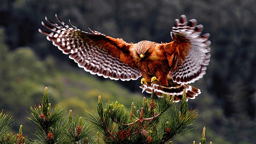

In [ ]:
from fastdownload import download_url
dest='bird.jpg'
download_url(urls[0],dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

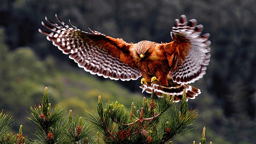

In [ ]:
download_url(search_images('forest photos',max_images=1)[0],'forest.jpg',show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [ ]:
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents = True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o,max_size=400,dest=path/o) 

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(3)

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird : {probs[0]:4f}")

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt',dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.868881,2.391910,01:09


epoch,train_loss,valid_loss,time
0,1.785760,1.493746,01:25
1,1.541345,1.196284,01:16
2,1.496356,1.333303,01:15
3,1.402273,1.040884,01:21
4,1.276412,0.985313,01:56
5,1.165879,0.925500,01:39
6,1.069907,0.887499,01:21
7,0.994668,0.881615,01:25


In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path = path, y_names = "salary",
    cat_names = ['workclass','education','marital-status','occupation','relationship'],
    cont_names = ['age','fnlwgt','education-num'],
    procs = [Categorify, FillMissing, Normalize])

dls.show_batch()

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

dls.show_batch()

learn = collab_learner(dls,y_range=(0.5,5.5))
learn.fine_tune(10)

,userId,movieId,rating
0,608,1721,4.0
1,128,377,5.0
2,518,589,4.0
3,461,47,5.0
4,23,1097,5.0
5,355,110,4.0
6,452,5952,1.0
7,431,1704,4.5
8,577,380,4.5
9,575,1923,1.0


epoch,train_loss,valid_loss,time
0,1.505816,1.416345,00:01


epoch,train_loss,valid_loss,time
0,1.392070,1.359348,00:00
1,1.282308,1.184886,00:00
2,1.043092,0.874562,00:00
3,0.815251,0.718771,00:00
4,0.696242,0.681196,00:00
5,0.654050,0.668382,00:00
6,0.629927,0.664164,00:00
7,0.619986,0.661450,00:00
8,0.610492,0.660559,00:00
9,0.598098,0.660459,00:00
